# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Arthurito Nehemia Gilbert Eduardo Luke Keintjem
- **Email:** keintjemarthurito@gmail.com
- **ID Dicoding:** arthuritokeintjem

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Dari mana asal pelanggan terbanyak? (Customer Segmentation)
- Pertanyaan 2: Metode pembayaran mana yang paling sering digunakan? (Payment Preferences)
- Pertanyaan 3: Kategori produk apa yang paling banyak terjual? (Top-Selling Products)
- Pertanyaan 4: Berapa rata-rata waktu pengiriman pesanan? (Delivery Performance)
- Pertanyaan 5: Bagaimana distribusi rating dari pelanggan? (Customer Satisfaction)

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster
from datetime import datetime

## Data Wrangling

### Gathering Data

In [3]:
# Membaca dataset
customers = pd.read_csv('data/customers_dataset.csv')
geolocation = pd.read_csv('data/geolocation_dataset.csv')
order_items = pd.read_csv('data/order_items_dataset.csv')
order_payments = pd.read_csv('data/order_payments_dataset.csv')
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')
orders = pd.read_csv('data/orders_dataset.csv')
products_category = pd.read_csv('data/product_category_name_translation.csv')
products = pd.read_csv('data/products_dataset.csv')
sellers = pd.read_csv('data/sellers_dataset.csv')

In [4]:
# Menampilkan informasi dataset customer
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight:**
- Dataset Customer terdapat 5 column:
    - customer_id: object
    - customer_unique_id: object
    - customer_zip_code_prefix: integer
    - customer_city: object
    - customer_state: object

In [5]:
# Menampilkan informasi dataset geolocation
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


**Insight:**
- Dataset Geolocation terdapat 5 column:
    - geolocation_zip_code_prefix: integer
    - geolocation_lat: float
    - geolocation_lng: float
    - geolocation_city: object
    - geolocation_state: object

In [6]:
# Menampilkan informasi dataset order items
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


**Insight:**
- Dataset Order Items terdapat 7 column:
    - order_id: object
    - order_item_id: integer
    - product_id: object
    - seller_id: object
    - shipping_limit_date: object
    - price: float
    - freight_value: float

In [7]:
# Menampilkan informasi dataset order payments
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


**Insight:**
- Dataset Order Payments terdapat 5 column:
    - order_id: object
    - payment_sequential: integer
    - payment_type: object
    - payment_installments: integer
    - payment_value: float

In [8]:
# Menampilkan informasi dataset order reviews
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Insight:**
- Dataset Order Reviews terdapat 7 column:
    - review_id: object
    - order_id: object
    - review_score: integer
    - review_comment_title: object
    - review_comment_message: object
    - review_creation_date: object
    - review_answer_timestamp: object

In [9]:
# Menampilkan informasi dataset orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Dataset Orders terdapat 8 column:
    - order_id: object
    - customer_id: object
    - order_status: object
    - order_purchase_timestamp: object
    - order_approved_at: object
    - order_delivered_carrier_date: object
    - order_delivered_customer_date: object
    - order_estimated_delivery_date: object

In [10]:
# Menampilkan informasi dataset products category
products_category.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


**Insight:**
- Dataset Products Category terdapat 2 column:
    - product_category_name: object
    - product_category_name_english: object

In [11]:
# Menampilkan informasi dataset products
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


**Insight:**
- Dataset Products terdapat 9 column:
    - product_id: object
    - product_category_name: object
    - product_name_length: float
    - product_description_lenght: float
    - product_photos_qty: float
    - product_weight_g: float
    - product_length_cm: float
    - product_height_cm: float
    - product_width_cm: float

In [12]:
# Menampilkan informasi dataset sellers
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


**Insight:**
- Dataset Sellers terdapat 4 column:
    - seller_id: object
    - seller_zip_code_prefix: integer
    - seller_city: object
    - seller_state: object

### Assessing Data

In [13]:
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [14]:
# Jumlah data yang hilang pada dataset customers
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

**Insight:**
- Tidak ada data yang hilang pada dataset customers

In [15]:
# Jumlah data yang hilang pada dataset geolocation
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

**Insight:**
- Tidak ada data yang hilang pada dataset geolocation

In [16]:
# Jumlah data yang hilang pada dataset order items
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

**Insight:**
- Tidak ada data yang hilang pada dataset order items

In [17]:
# Jumlah data yang hilang pada dataset order payments
order_payments.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

**Insight:**
- Tidak ada data yang hilang pada dataset order payments

In [18]:
# Jumlah data yang hilang pada dataset order reviews
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

**Insight:**
- Terdapat data yang hilang pada dataset order reviews:
    - review_comment_title: 87656
    - review_comment_message: 58247

In [19]:
# Jumlah data yang hilang pada dataset orders
orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

**Insight:**
- Terdapat data yang hilang pada dataset orders:
    - order_approved_at: 160
    - order_delivered_carrier_date: 1783
    - order_delivered_customer_date: 2965

In [20]:
# Jumlah data yang hilang pada dataset products category
products_category.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

**Insight:**
- Tidak ada data yang hilang pada dataset products category

In [21]:
# Jumlah data yang hilang pada dataset products
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

**Insight:**
- Terdapat data yang hilang pada dataset order payments:
    - product_category_name: 610
    - product_name_lenght: 610
    - product_description_lenght: 610
    - product_photos_qty: 610
    - product_weight_g: 2
    - product_length_cm: 2
    - product_height_cm: 2
    - product_width_cm: 2

In [22]:
# Jumlah data yang hilang pada dataset sellers
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

**Insight:**
- Tidak ada data yang hilang pada dataset sellers

In [23]:
# Jumlah data yang duplikat pada dataset customers
customers.duplicated().sum()

0

**Insight:**
- Tidak ada data yang duplikat pada dataset customers

In [24]:
# Jumlah data yang duplikat pada dataset geolocation
geolocation.duplicated().sum()

261831

**Insight:**
- Terdapat data yang duplikat pada dataset customers: 261831

In [25]:
# Jumlah data yang duplikat pada dataset order items
order_items.duplicated().sum()

0

**Insight:**
- Tidak ada data yang duplikat pada dataset order items

In [26]:
# Jumlah data yang duplikat pada dataset order payments
order_payments.duplicated().sum()

0

**Insight:**
- Tidak ada data yang duplikat pada dataset order payments

In [27]:
# Jumlah data yang duplikat pada dataset order reviews
order_reviews.duplicated().sum()

0

**Insight:**
- Tidak ada data yang duplikat pada dataset order reviews

In [28]:
# Jumlah data yang duplikat pada dataset orders
orders.duplicated().sum()

0

**Insight:**
- Tidak ada data yang duplikat pada dataset orders

In [29]:
# Jumlah data yang duplikat pada dataset products category
products_category.duplicated().sum()

0

**Insight:**
- Tidak ada data yang duplikat pada dataset products category

In [30]:
# Jumlah data yang duplikat pada dataset products
products.duplicated().sum()

0

**Insight:**
- Tidak ada data yang duplikat pada dataset products

In [31]:
# Jumlah data yang duplikat pada dataset sellers
sellers.duplicated().sum()

0

**Insight:**
- Tidak ada data yang duplikat pada dataset sellers

**Insight:**
- Dataset yang memiliki data hilang: order_reviews (145903), orders (4908), products (2448).
- Dataset yang memiliki data duplikat: geolocation (261831)

### Cleaning Data

In [32]:
# Cek persentase missing value

def missing_percentage(df):
    return df.isnull().sum() / len(df) * 100

print('Persentase missing value pada order_reviews:')
print(missing_percentage(order_reviews))
print('\nPersentase missing value pada orders:')
print(missing_percentage(orders))
print('\nPersentase missing value pada products:')
print(missing_percentage(products))

Persentase missing value pada order_reviews:
review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

Persentase missing value pada orders:
order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

Persentase missing value pada products:
product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_c

In [33]:
# Menangani missing value

# order_reviews: Imputasi dengan placeholder
order_reviews_imputed = order_reviews.copy()
order_reviews_imputed['review_comment_title'] = order_reviews_imputed['review_comment_title'].fillna("No Title")
order_reviews_imputed['review_comment_message'] = order_reviews_imputed['review_comment_message'].fillna("No Comment")

# orders: Drop baris dengan missing value
orders_clean = orders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'])

# products: Imputasi missing value
# Kolom kategorikal dengan modus
products['product_category_name'] = products['product_category_name'].fillna(products['product_category_name'].mode()[0])

# Imputasi untuk kolom numerik dengan missing ~1,85%
numeric_cols = ['product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for col in numeric_cols:
    products[col] = products[col].fillna(products[col].median())

# Untuk kolom dimensi yang missing sangat minim, bisa juga imputasi dengan median
dim_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in dim_cols:
    products[col] = products[col].fillna(products[col].median())

In [34]:
# Menangani duplikat pada dataset geolocation
geolocation_clean = geolocation.drop_duplicates()

print('Shape order_reviews sebelum:', order_reviews.shape, 'sesudah:', order_reviews_imputed.shape)
print('Shape orders sebelum:', orders.shape, 'sesudah:', orders_clean.shape)
print('Shape products sebelum:', products.shape, 'sesudah:', products.shape)
print('Shape geolocation sebelum:', geolocation.shape, 'sesudah:', geolocation_clean.shape)

Shape order_reviews sebelum: (99224, 7) sesudah: (99224, 7)
Shape orders sebelum: (99441, 8) sesudah: (96461, 8)
Shape products sebelum: (32951, 9) sesudah: (32951, 9)
Shape geolocation sebelum: (1000163, 5) sesudah: (738332, 5)


In [35]:
# Menyimpan CSV
order_reviews_imputed.to_csv('dashboard/order_reviews_imputed.csv', index=False)
orders_clean.to_csv('dashboard/orders_clean.csv', index=False)
products.to_csv('dashboard/products_clean.csv', index=False)
geolocation_clean.to_csv('dashboard/geolocation_clean.csv', index=False)

print('Dataset berhasil disimpan!')

Dataset berhasil disimpan!


**Insight:**
- Penanganan Missing Value
    - Untuk Order Reviews, kolom dengan missing value sangat tinggi (review_comment_title dan review_comment_message) diimputasi dengan placeholder jika analisis teks diperlukan.
    - Untuk Orders, baris dengan missing pada kolom-kolom penting (order_approved_at, order_delivered_carrier_date, order_delivered_customer_date) dihapus agar data waktu transaksi tetap akurat.
    - Untuk Products, missing value pada kolom kategorikal diimputasi dengan mode, sedangkan kolom numerik diimputasi dengan median untuk menjaga distribusi data.
- Penanganan Duplikat: Duplikasi pada dataset Geolocation dihapus dengan drop_duplicates() sehingga data lokasi menjadi unik dan tidak bias saat analisis geospasial.

## Exploratory Data Analysis (EDA)

### Explore dataset secara keseluruhan

In [36]:
# Melihat rangkuman parameter statistik dari dataset cus
customers.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**
- Keunikan Pelanggan: Data menunjukkan jumlah customer unik hampir sama dengan jumlah total baris, yang mengindikasikan bahwa data pelanggan relatif bersih dari duplikasi.
- Sebaran Geografis: Distribusi atribut seperti customer_state, customer_city, dan customer_zip_code_prefix memberikan gambaran bahwa terdapat konsentrasi pelanggan di wilayah tertentu (misalnya, kota besar seperti Sao Paulo), yang bisa dijadikan target pemasaran.

In [37]:
# Melihat rangkuman parameter statistik dari dataset geolocation
geolocation_clean.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,738332.000000,738332.000000,738332.000000,738332,738332
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,79927,285976
mean,38316.086800,-20.998353,-46.461098,NaN,NaN
std,30632.496675,5.892315,4.393705,NaN,NaN
min,1001.000000,-36.605374,-101.466766,NaN,NaN
25%,12600.000000,-23.603061,-48.867822,NaN,NaN
50%,29144.000000,-22.873588,-46.647278,NaN,NaN
75%,65950.000000,-19.923336,-43.836974,NaN,NaN


**Insight:**
- Variasi Koordinat: Statistik geolocation menunjukkan adanya variabilitas signifikan pada koordinat latitude dan longitude, mengindikasikan cakupan geografis yang luas.
- Informasi Lokasi Rinci: Data ini menyediakan informasi penting untuk pemetaan, yang memungkinkan analisis distribusi pelanggan dan penjual berdasarkan wilayah.

In [38]:
# Melihat rangkuman parameter statistik dari dataset order items
order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


**Insight:**
- Jumlah Item per Order: Data menunjukkan rata-rata jumlah item per order yang cenderung rendah, mengindikasikan bahwa banyak pesanan hanya terdiri dari satu item.
- Variasi Harga: Statistik harga produk dalam order items mengungkapkan adanya rentang harga yang lebar, dari produk dengan harga rendah hingga produk dengan harga tinggi.

In [39]:
# Melihat rangkuman parameter statistik dari dataset order payments
order_payments.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


**Insight:**
- Metode Pembayaran Dominan: Distribusi nilai dalam kolom payment_type menunjukkan bahwa metode pembayaran tertentu (misalnya, kartu kredit) mendominasi transaksi.
- Nilai Transaksi: Statistik payment_value mengungkapkan bahwa sebagian besar pembayaran berada pada rentang nilai tertentu, dengan beberapa transaksi yang memiliki nilai jauh lebih tinggi.

In [40]:
# Melihat rangkuman parameter statistik dari dataset order reviews
order_reviews_imputed.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4528,36160,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,No Title,No Comment,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,87656,58247,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


**Insight:**
- Tingkat Kepuasan Pelanggan: Mayoritas review score cenderung tinggi, menunjukkan tingkat kepuasan yang baik dari pelanggan.
- Ketersediaan Ulasan: Meskipun terdapat missing value pada kolom ulasan teks, nilai numerik (review_score) memberikan gambaran yang jelas tentang persepsi pelanggan terhadap produk dan layanan.

In [41]:
# Melihat rangkuman parameter statistik dari dataset orders
orders_clean.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,96461,96461,96461,96461,96461,96461,96461,96461
unique,96461,96461,2,95939,88272,80100,95649,445
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96455,3,9,47,3,507


**Insight:**
- Distribusi Waktu Transaksi: Statistik orders memberikan gambaran tentang sebaran tanggal pembelian, yang dapat digunakan untuk menganalisis tren musiman dan volume order per periode.
- Performa Pengiriman: Dengan informasi tanggal order, approved, dan pengiriman, data ini memungkinkan analisis performa logistik seperti waktu pengiriman dan delay, yang krusial untuk evaluasi efisiensi operasional.

In [42]:
# Melihat rangkuman parameter statistik dari dataset products category
products_category.describe(include='all')

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
- Keanekaragaman Kategori: Data ini menampilkan berbagai kategori produk beserta terjemahannya, yang berguna untuk menyederhanakan analisis pada tingkat kategori.
- Keterkaitan dengan Produk: Informasi ini dapat dikaitkan dengan data produk untuk mengelompokkan dan menganalisis penjualan berdasarkan kategori, sehingga memudahkan identifikasi kategori unggulan.

In [43]:
# Melihat rangkuman parameter statistik dari dataset products
products.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3639,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,2276.376802,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,4281.926387,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Insight:**
- Variasi Fisik Produk: Statistik mengenai dimensi dan berat produk menunjukkan adanya keragaman yang besar, mencerminkan portofolio produk yang luas.
- Distribusi Harga dan Deskripsi: Data produk juga menyediakan informasi tentang nama, deskripsi, dan kategori produk, yang dapat dianalisis untuk mengidentifikasi produk unggulan dan strategi penetapan harga.

In [44]:
# Melihat rangkuman parameter statistik dari dataset sellers
sellers.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


**Insight:**
- Keunikan Seller: Data sellers menampilkan jumlah seller yang unik, yang dapat digunakan untuk mengukur diversitas penjual dalam platform.
- Konsentrasi Seller: Distribusi seller berdasarkan lokasi atau volume penjualan dapat mengungkapkan bahwa terdapat penjual dominan yang berkontribusi signifikan terhadap total penjualan.

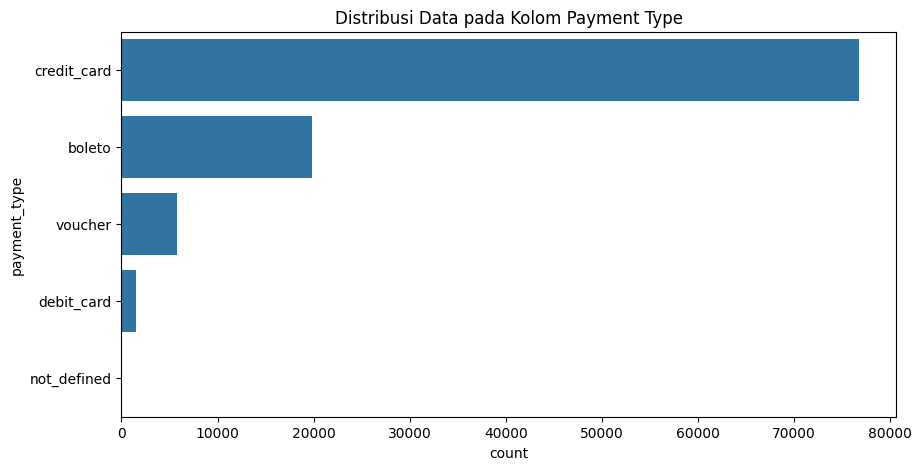

In [45]:
# Melihat distribusi data pada kolom 'payment_type'

plt.figure(figsize=(10, 5))
sns.countplot(y='payment_type', data=order_payments, order=order_payments['payment_type'].value_counts().index)
plt.title('Distribusi Data pada Kolom Payment Type')
plt.show()

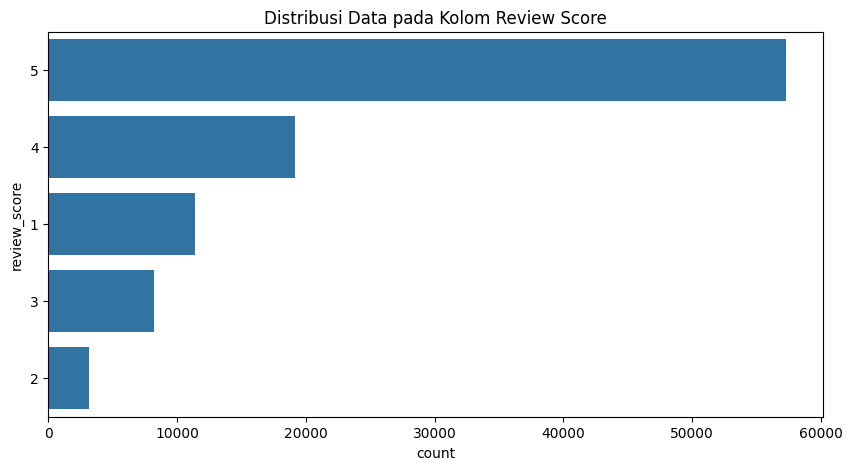

In [46]:
# Melihat distribusi data pada kolom 'review_score'

plt.figure(figsize=(10, 5))
sns.countplot(y='review_score', data=order_reviews_imputed, order=order_reviews_imputed['review_score'].value_counts().index)
plt.title('Distribusi Data pada Kolom Review Score')
plt.show()

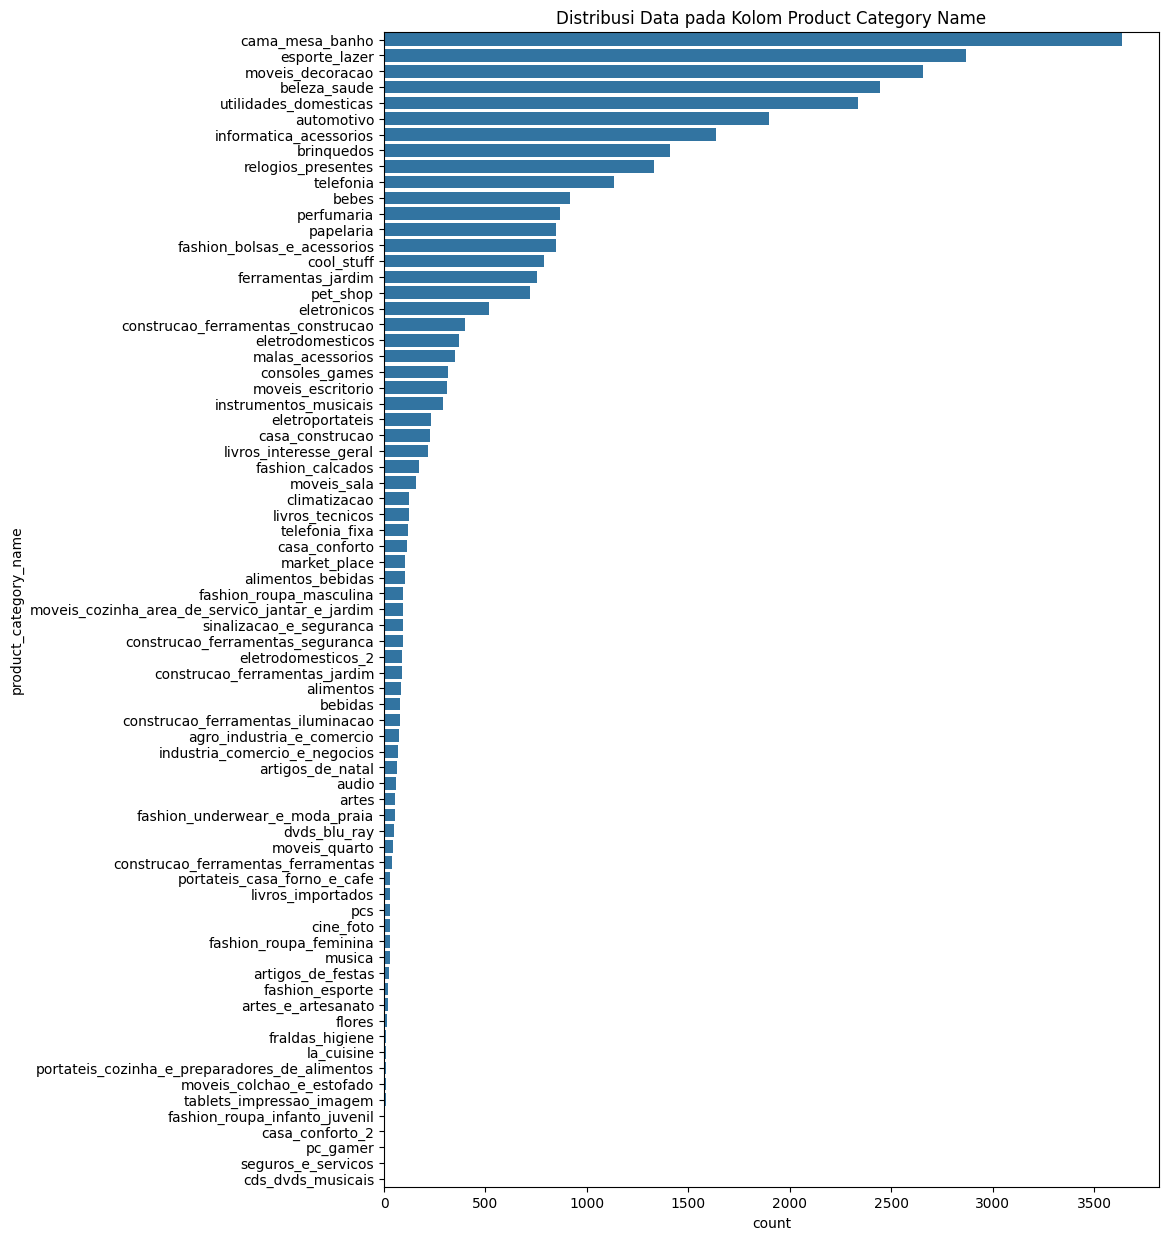

In [83]:
# Melihat distribusi data pada kolom 'product_category_name'

plt.figure(figsize=(10, 15))
sns.countplot(y='product_category_name', data=products, order=products['product_category_name'].value_counts().index)
plt.title('Distribusi Data pada Kolom Product Category Name')
plt.show()

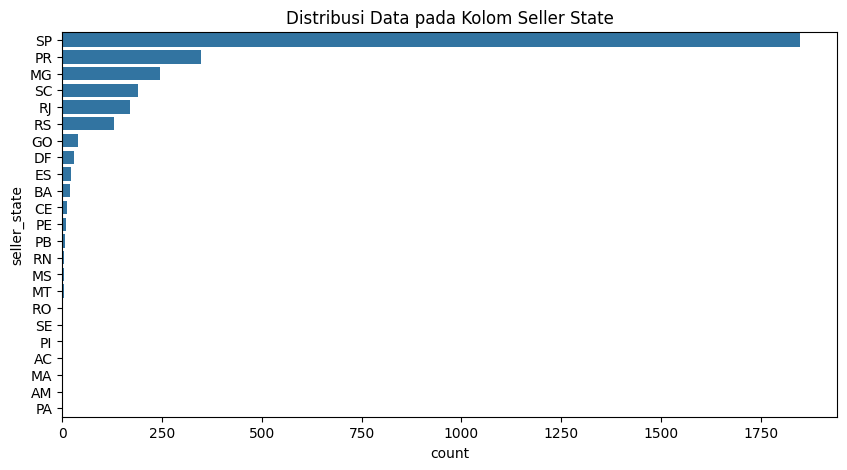

In [54]:
# Melihat distribusi data pada kolom 'seller_state'

plt.figure(figsize=(10, 5))
sns.countplot(y='seller_state', data=sellers, order=sellers['seller_state'].value_counts().index)
plt.title('Distribusi Data pada Kolom Seller State')
plt.show()

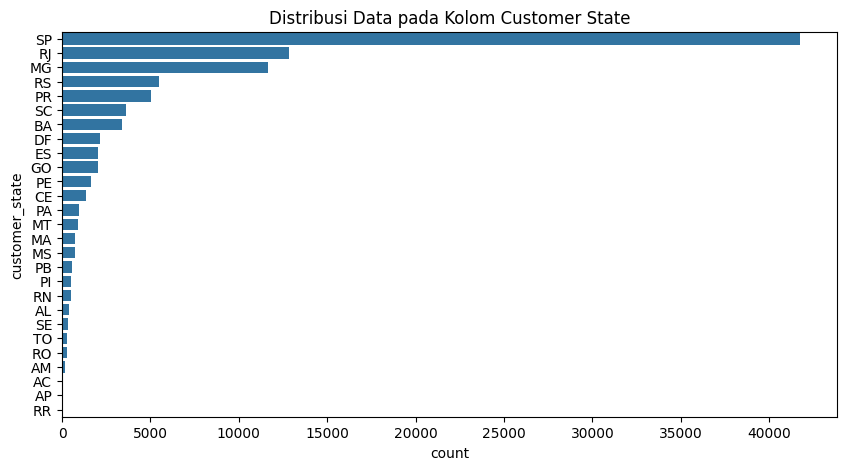

In [55]:
# Melihat distribusi data pada kolom 'customer_state'

plt.figure(figsize=(10, 5))
sns.countplot(y='customer_state', data=customers, order=customers['customer_state'].value_counts().index)
plt.title('Distribusi Data pada Kolom Customer State')
plt.show()

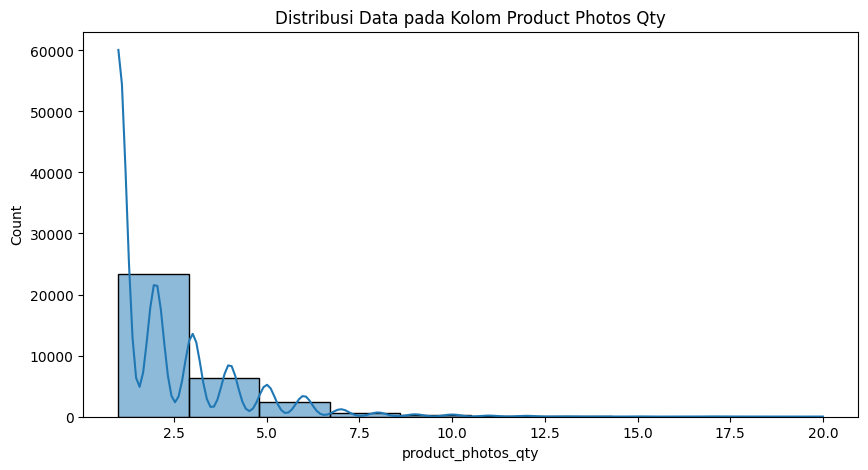

In [56]:
# Melihat distribusi data pada kolom 'product_photos_qty'

plt.figure(figsize=(10, 5))
sns.histplot(products['product_photos_qty'], bins=10, kde=True)
plt.title('Distribusi Data pada Kolom Product Photos Qty')
plt.show()

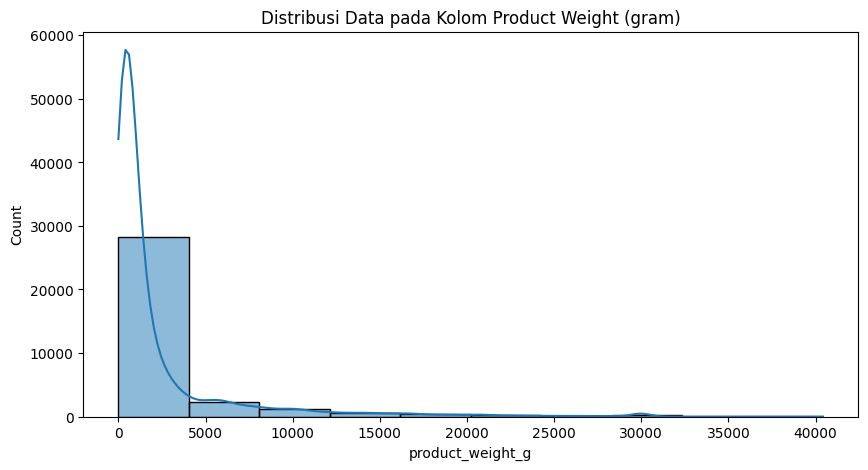

In [57]:
# Melihat distribusi data pada kolom 'product_weight_g'

plt.figure(figsize=(10, 5))
sns.histplot(products['product_weight_g'], bins=10, kde=True)
plt.title('Distribusi Data pada Kolom Product Weight (gram)')
plt.show()

C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\3053268035.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clean['order_month'] = orders_clean['order_approved_at'].apply(lambda x: x[:7])


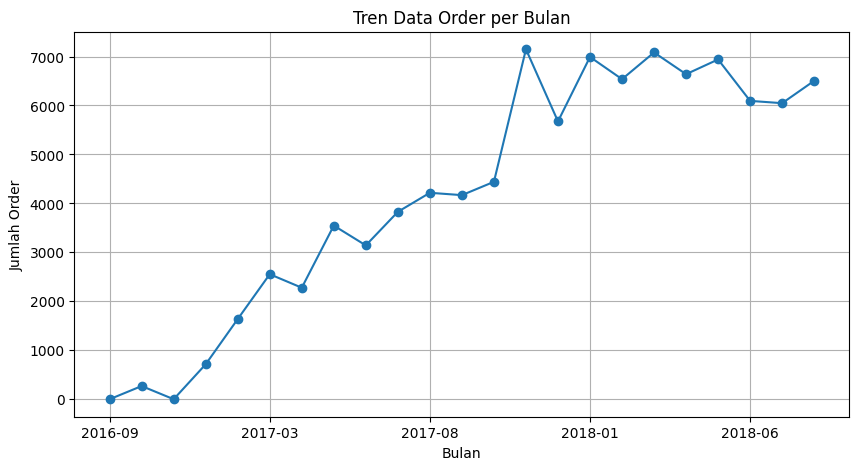

In [58]:
# Melihat tren data order per bulan

orders_clean['order_month'] = orders_clean['order_approved_at'].apply(lambda x: x[:7])
monthly_orders = orders_clean.groupby('order_month').count()['order_id']

plt.figure(figsize=(10, 5))
monthly_orders.plot(kind='line', marker='o')
plt.title('Tren Data Order per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Order')
plt.grid()
plt.show()

C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\1815467837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clean['order_hour'] = orders_clean['order_approved_at'].apply(lambda x: x[11:13])


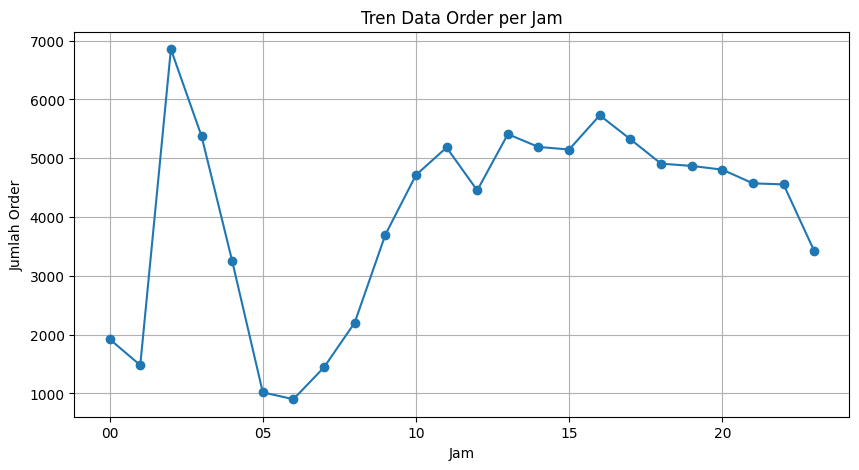

In [59]:
# Melihat tren data order per jam

orders_clean['order_hour'] = orders_clean['order_approved_at'].apply(lambda x: x[11:13])
hourly_orders = orders_clean.groupby('order_hour').count()['order_id']

plt.figure(figsize=(10, 5))
hourly_orders.plot(kind='line', marker='o')
plt.title('Tren Data Order per Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Order')
plt.grid()
plt.show()

C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\2498890869.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='state', y='customer_count', data=customer_location, palette='viridis')


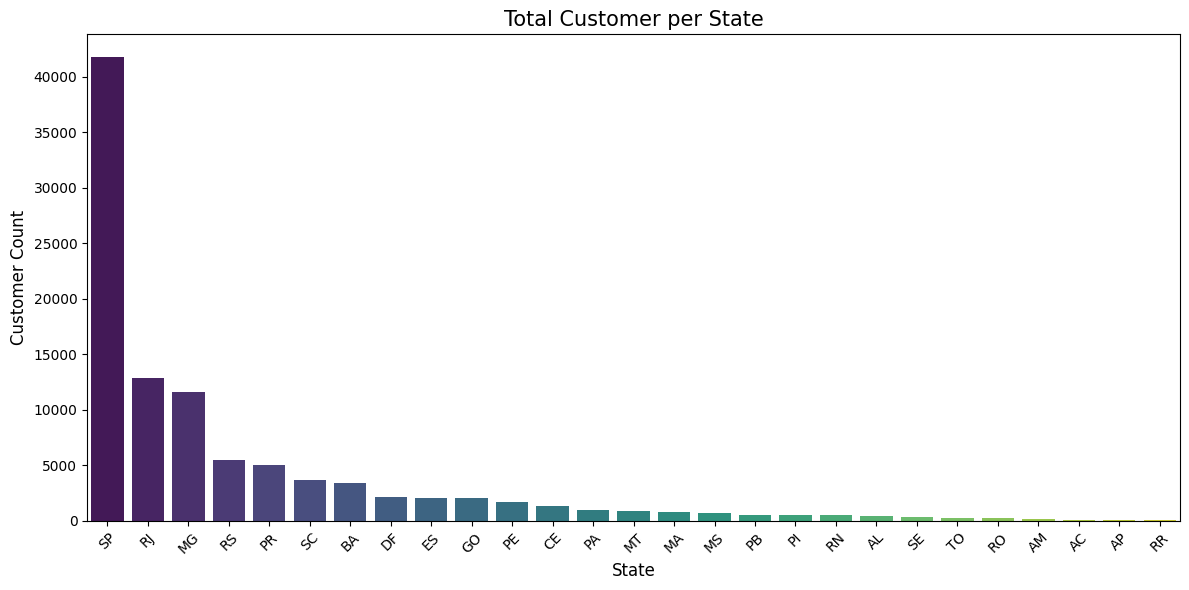

In [60]:
# Analisa asal pelanggan terbanyak
customer_location = customers['customer_state'].value_counts().reset_index()
customer_location.columns = ['state', 'customer_count']
customer_location = customer_location.sort_values(by='customer_count', ascending=False)

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='customer_count', data=customer_location, palette='viridis')
plt.title('Total Customer per State', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

Text(0, 0.5, 'Customer Count')

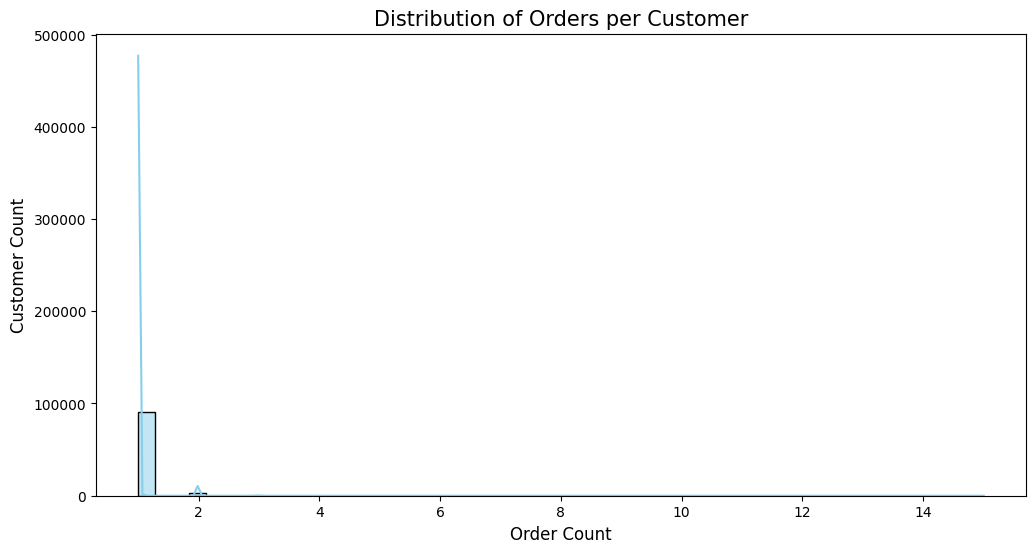

In [61]:
# Analisa rata-rata jumlah pesanan per pelanggan
# Menggabungkan dataset orders_clean dengan customers
orders_customers = pd.merge(orders_clean, customers, on='customer_id')

# Menghitung jumlah pesanan per pelanggan
order_per_customer = orders_customers.groupby('customer_unique_id')['order_id'].count().reset_index()
order_per_customer.columns = ['customer_unique_id', 'order_count']

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.histplot(order_per_customer['order_count'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Orders per Customer', fontsize=15)
plt.xlabel('Order Count', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)

Text(0, 0.5, 'Order Count')

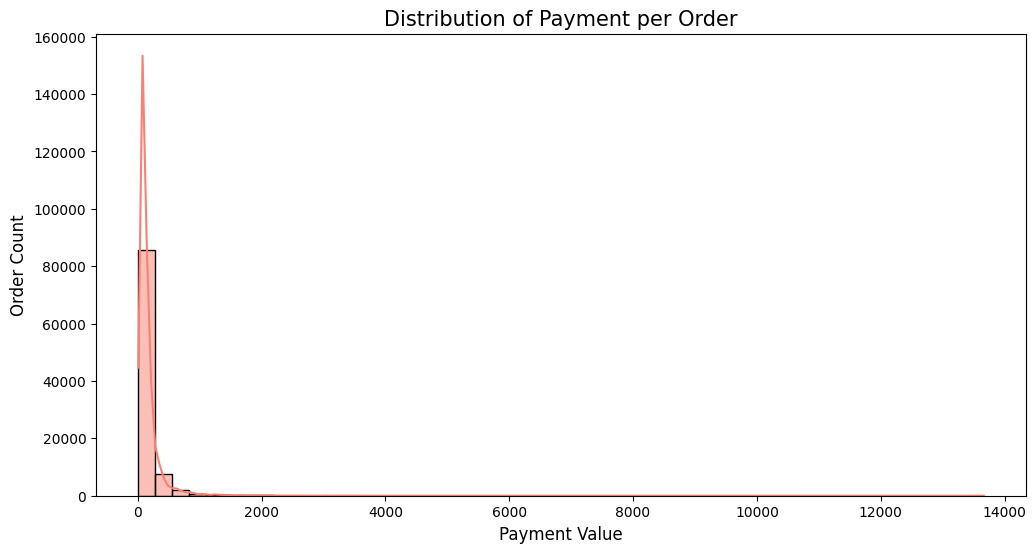

In [62]:
# Analisa rata-rata nilai transaksi per pesanan
# Menggabungkan dataset orders_clean dengan order_payments
orders_payments = pd.merge(orders_clean, order_payments, on='order_id')

# Menghitung rata-rata nilai transaksi per pesanan
payment_per_order = orders_payments.groupby('order_id')['payment_value'].sum().reset_index()
payment_per_order.columns = ['order_id', 'payment_value']

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.histplot(payment_per_order['payment_value'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Payment per Order', fontsize=15)
plt.xlabel('Payment Value', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

Text(0.5, 0, 'Item Count')

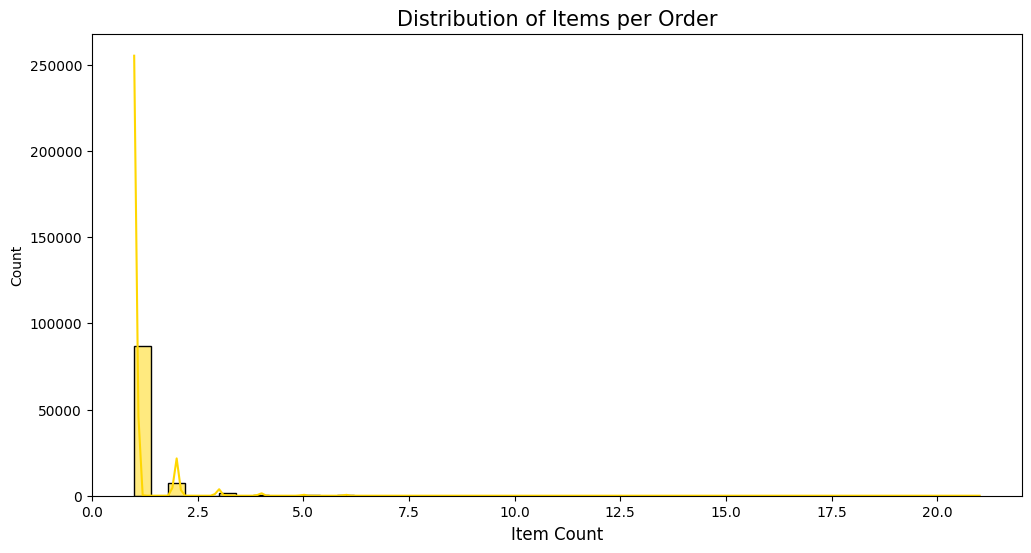

In [63]:
# Analisa distribusi jumlah item per pesanan
# Menggabungkan dataset orders_clean dengan order_items
orders_items = pd.merge(orders_clean, order_items, on='order_id')

# Menghitung jumlah item per pesanan
item_per_order = orders_items.groupby('order_id')['order_item_id'].count().reset_index()
item_per_order.columns = ['order_id', 'item_count']

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.histplot(item_per_order['item_count'], bins=50, kde=True, color='gold')
plt.title('Distribution of Items per Order', fontsize=15)
plt.xlabel('Item Count', fontsize=12)

C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\3985889269.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='item_count', data=top_category, palette='magma')


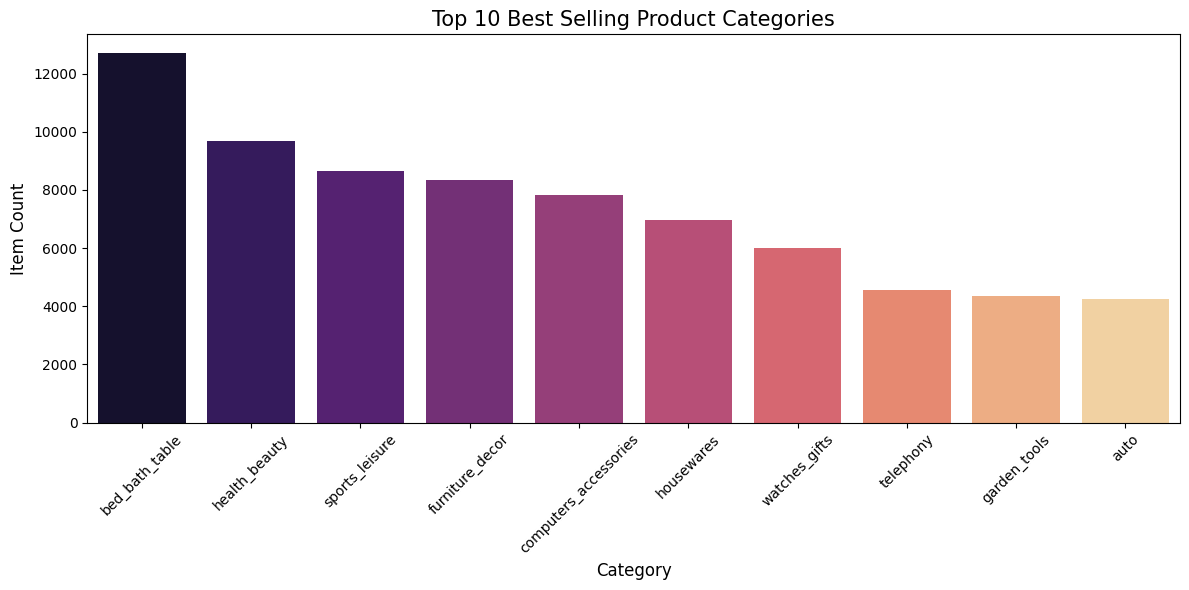

In [64]:
# Analisa top 10 kategori produk paling banyak terjual
# Menggabungkan dataset products dengan order_items
products_order_items = pd.merge(products, order_items, on='product_id')

# Menggabungkan dataset products_category dengan products_order_items
products_category_order_items = pd.merge(products_category, products_order_items, on='product_category_name')

# Menghitung jumlah item terjual per kategori produk
top_category = products_category_order_items['product_category_name_english'].value_counts().reset_index()
top_category.columns = ['category', 'item_count']
top_category = top_category.sort_values(by='item_count', ascending=False).head(10)

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='item_count', data=top_category, palette='magma')
plt.title('Top 10 Best Selling Product Categories', fontsize=15)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Item Count', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\1991083703.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='avg_review_score', y='category', data=top_review_category, palette='viridis')


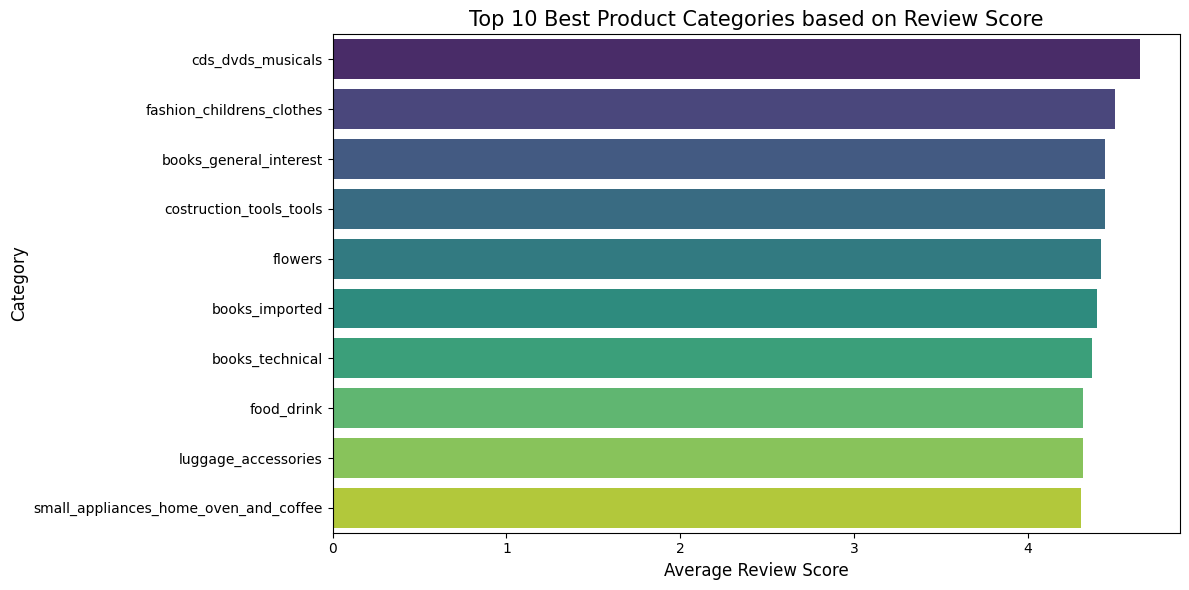

In [66]:
# Analisa  top 10 sebaran rating produk berdasarkan kategori produk
# Menggabungkan dataset order_reviews_imputed dengan products_category_order_items
reviews_category = pd.merge(order_reviews_imputed, products_category_order_items, on='order_id')

# Menghitung rata-rata review score per kategori produk
top_review_category = reviews_category.groupby('product_category_name_english')['review_score'].mean().reset_index()
top_review_category.columns = ['category', 'avg_review_score']
top_review_category = top_review_category.sort_values(by='avg_review_score', ascending=False).head(10)

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.barplot(x='avg_review_score', y='category', data=top_review_category, palette='viridis')
plt.title('Top 10 Best Product Categories based on Review Score', fontsize=15)
plt.xlabel('Average Review Score', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()

C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\93800844.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clean['order_approved_at'] = pd.to_datetime(orders_clean['order_approved_at'])
C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\93800844.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clean['order_delivered_carrier_date'] = pd.to_datetime(orders_clean['order_delivered_carrier_date'])
C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\93800844.py:5: SettingWithCopyWarning: 


Text(0, 0.5, 'Order Count')

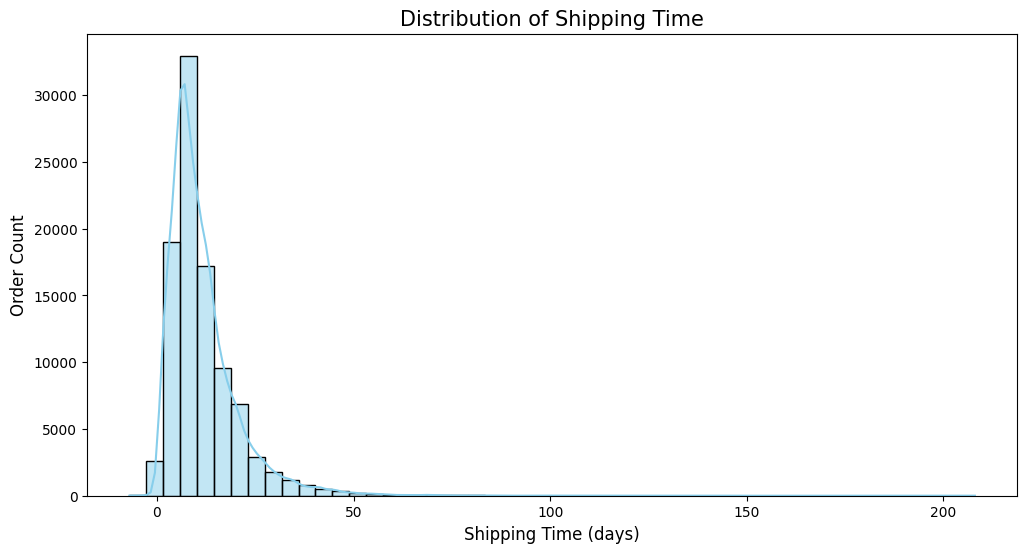

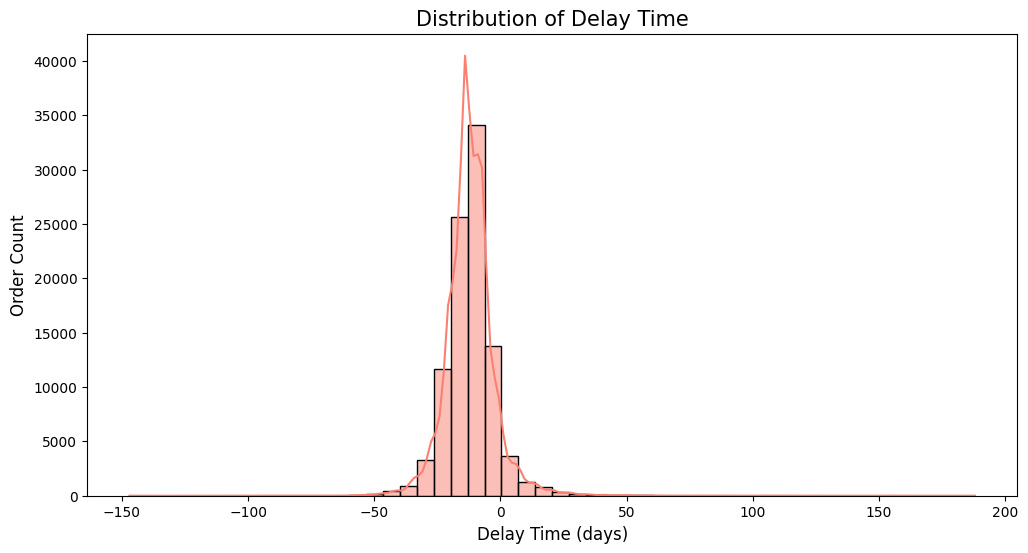

In [67]:
# Analisa rata-rata waktu pengiriman pesanan
# Menghitung rata-rata waktu pengiriman pesanan
orders_clean['order_approved_at'] = pd.to_datetime(orders_clean['order_approved_at'])
orders_clean['order_delivered_carrier_date'] = pd.to_datetime(orders_clean['order_delivered_carrier_date'])
orders_clean['order_delivered_customer_date'] = pd.to_datetime(orders_clean['order_delivered_customer_date'])
orders_clean['order_estimated_delivery_date'] = pd.to_datetime(orders_clean['order_estimated_delivery_date'])
orders_clean['shipping_time'] = orders_clean['order_delivered_customer_date'] - orders_clean['order_approved_at']
orders_clean['delay_time'] = orders_clean['order_delivered_customer_date'] - orders_clean['order_estimated_delivery_date']
orders_clean['shipping_time'] = orders_clean['shipping_time'].dt.days
orders_clean['delay_time'] = orders_clean['delay_time'].dt.days

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.histplot(orders_clean['shipping_time'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Shipping Time', fontsize=15)
plt.xlabel('Shipping Time (days)', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

plt.figure(figsize=(12, 6))
sns.histplot(orders_clean['delay_time'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Delay Time', fontsize=15)
plt.xlabel('Delay Time (days)', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Dari mana asal pelanggan terbanyak? (Customer Segmentation)

C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\1663941646.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='State', y='Customer Count', data=customer_location, palette='Blues_r')


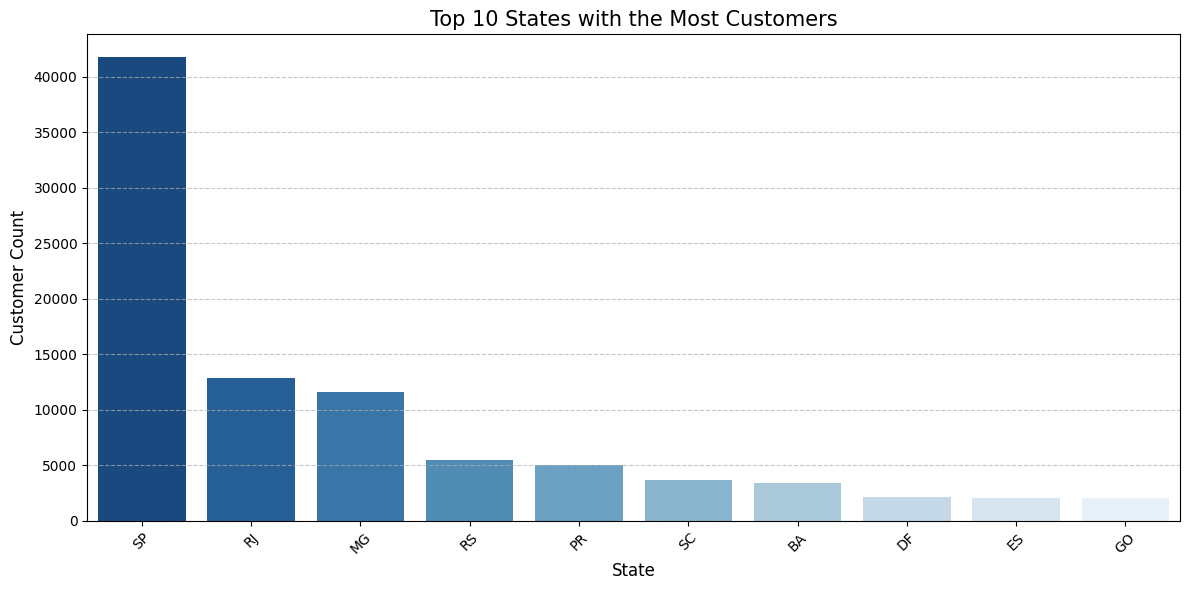

In [84]:
# Mengambil hanya top 10 state dengan pelanggan terbanyak
customer_location = customers['customer_state'].value_counts().reset_index()
customer_location.columns = ['State', 'Customer Count']
customer_location = customer_location.sort_values(by='Customer Count', ascending=False).head(10)

# Membuat visualisasi dengan warna yang lebih enak dilihat
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Customer Count', data=customer_location, palette='Blues_r')

# Menambahkan judul dan label
plt.title('Top 10 States with the Most Customers', fontsize=15)
plt.xlabel('State', fontsize=12)
plt.ylabel('Customer Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Visualisasi bar chart menunjukkan distribusi pelanggan per state, dengan beberapa state (misalnya “SP”) memiliki jumlah pelanggan yang jauh lebih tinggi dibandingkan state lainnya.
- Perbedaan signifikan antar state mengindikasikan bahwa wilayah tertentu memiliki potensi pasar yang lebih besar.
- Data geografis ini bisa dijadikan dasar untuk strategi pemasaran yang ditargetkan sesuai dengan potensi wilayah.

### Pertanyaan 2: Metode pembayaran mana yang paling sering digunakan? (Payment Preferences)

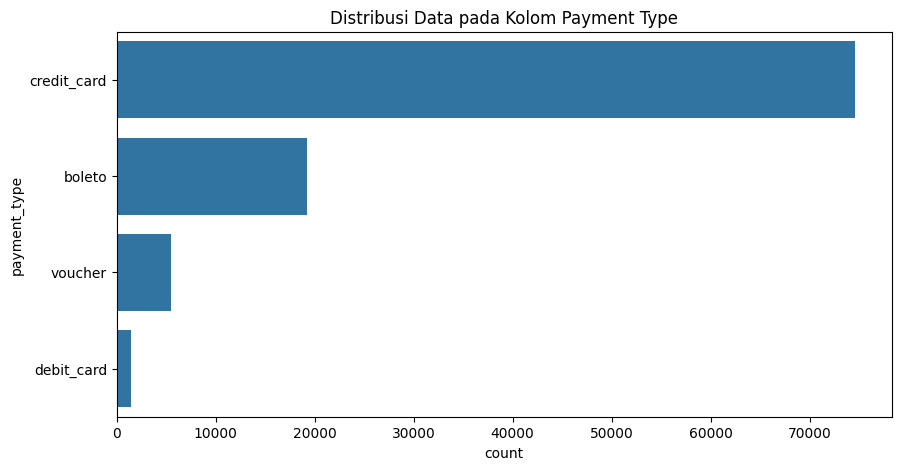

In [69]:
# Pertanyaan 2: Metode pembayaran apa yang paling sering digunakan oleh pelanggan?
# Menggabungkan dataset order_payments dan orders_clean
order_payments_orders = pd.merge(order_payments, orders_clean, on='order_id', how='inner')

# Menggabungkan dataset order_payments_orders dengan customers
order_payments_orders_customers = pd.merge(order_payments_orders, customers, on='customer_id', how='inner')

# Melihat distribusi data pada kolom 'payment_type'
plt.figure(figsize=(10, 5))
sns.countplot(y='payment_type', data=order_payments_orders_customers, order=order_payments_orders_customers['payment_type'].value_counts().index)
plt.title('Distribusi Data pada Kolom Payment Type')
plt.show()

**Insight:**
- Count plot dari kolom ‘payment_type’ menunjukkan bahwa metode pembayaran tertentu, misalnya kartu kredit, mendominasi transaksi.
- Distribusi ini mengindikasikan preferensi pelanggan terhadap pembayaran non-tunai dan digital.
- Informasi ini memberikan dasar untuk evaluasi dan pengoptimalan sistem pembayaran agar sesuai dengan kebiasaan konsumen.

### Pertanyaan 3: Kategori produk apa yang paling banyak terjual? (Top-Selling Products)

C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\4066217246.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Count', y='Category', data=top_category, palette='crest')


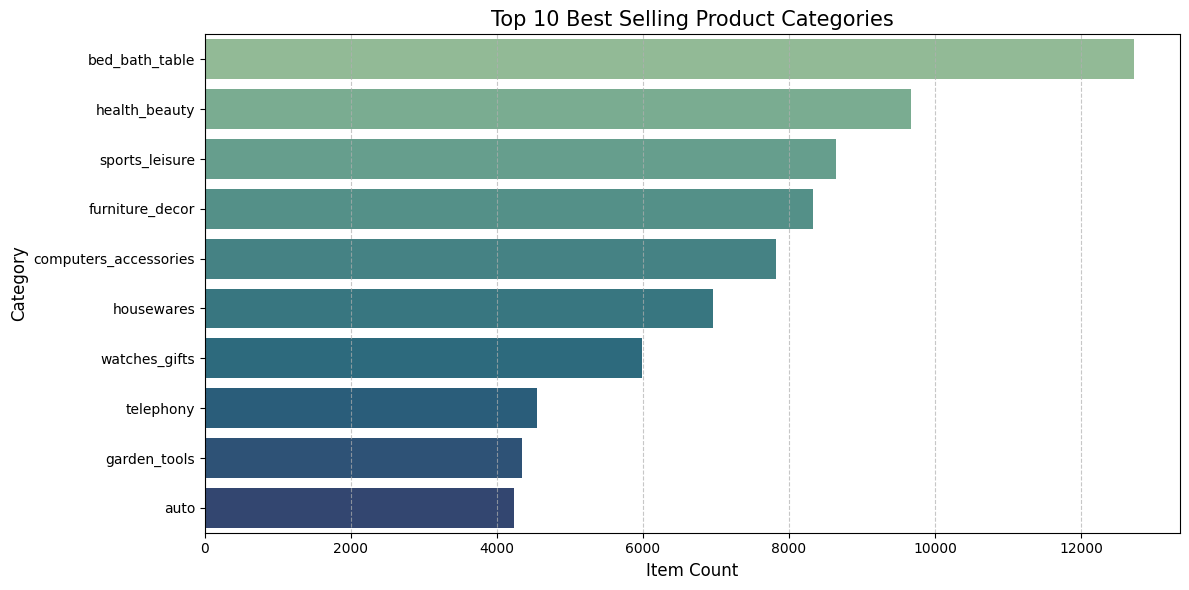

In [86]:
# Menggabungkan dataset products dengan order_items
products_order_items = pd.merge(products, order_items, on='product_id')

# Menggabungkan dataset products_category dengan products_order_items
products_category_order_items = pd.merge(products_category, products_order_items, on='product_category_name')

# Menghitung jumlah item terjual per kategori produk
top_category = products_category_order_items['product_category_name_english'].value_counts().reset_index()
top_category.columns = ['Category', 'Item Count']
top_category = top_category.sort_values(by='Item Count', ascending=False).head(10)

# Membuat visualisasi dengan warna yang lebih nyaman dilihat
plt.figure(figsize=(12, 6))
sns.barplot(x='Item Count', y='Category', data=top_category, palette='crest')

# Menambahkan judul dan label
plt.title('Top 10 Best Selling Product Categories', fontsize=15)
plt.xlabel('Item Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
- Visualisasi bar chart top 10 kategori produk menunjukkan bahwa beberapa kategori memiliki jumlah item terjual jauh lebih tinggi dibandingkan yang lain.
- Kategori dengan penjualan tinggi mengindikasikan adanya permintaan yang kuat dari pelanggan terhadap produk-produk tertentu.
- Insight ini sangat berguna untuk pengambilan keputusan terkait inventaris dan strategi promosi agar lebih fokus pada kategori yang paling menguntungkan.

### Pertanyaan 4: Berapa rata-rata waktu pengiriman pesanan? (Delivery Performance)

C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\2132031004.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clean['order_approved_at'] = pd.to_datetime(orders_clean['order_approved_at'])
C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\2132031004.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_clean['order_delivered_carrier_date'] = pd.to_datetime(orders_clean['order_delivered_carrier_date'])
C:\Users\arthur_k\AppData\Local\Temp\ipykernel_8788\2132031004.py:5: SettingWithCopyWarn

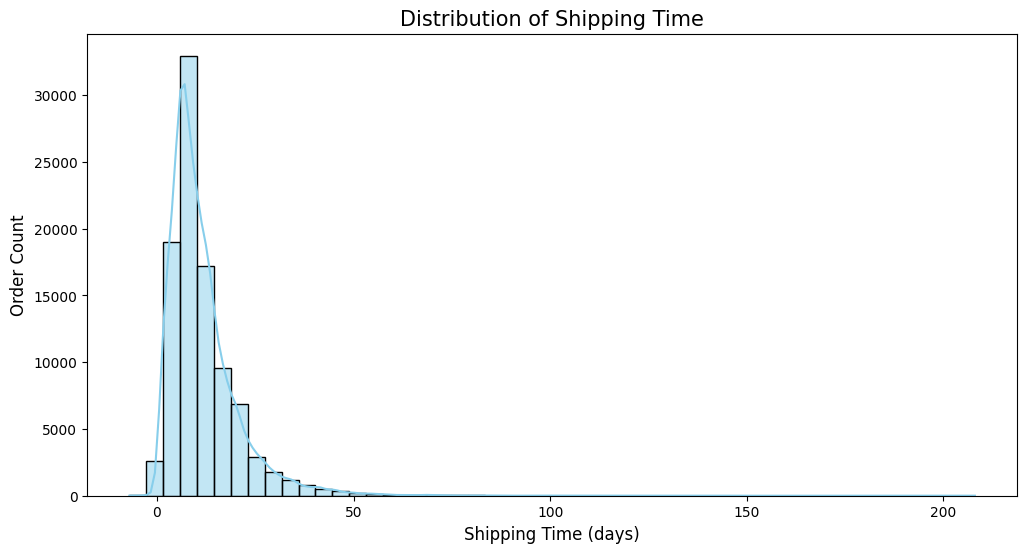

Text(0, 0.5, 'Order Count')

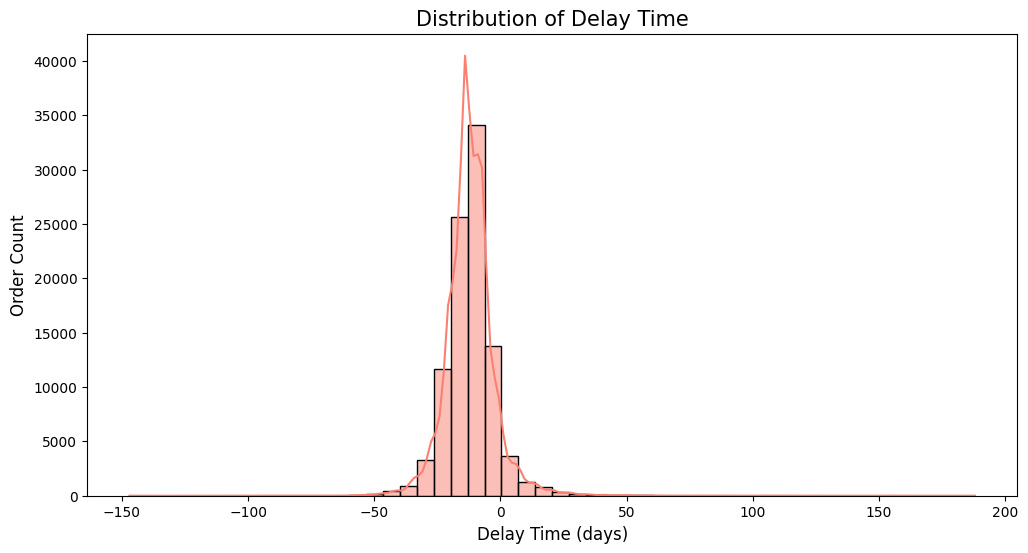

In [71]:
# Pertanyaan 4: Berapa rata-rata waktu pengiriman pesanan?
# Menghitung rata-rata waktu pengiriman pesanan
orders_clean['order_approved_at'] = pd.to_datetime(orders_clean['order_approved_at'])
orders_clean['order_delivered_carrier_date'] = pd.to_datetime(orders_clean['order_delivered_carrier_date'])
orders_clean['order_delivered_customer_date'] = pd.to_datetime(orders_clean['order_delivered_customer_date'])
orders_clean['order_estimated_delivery_date'] = pd.to_datetime(orders_clean['order_estimated_delivery_date'])
orders_clean['shipping_time'] = orders_clean['order_delivered_customer_date'] - orders_clean['order_approved_at']
orders_clean['delay_time'] = orders_clean['order_delivered_customer_date'] - orders_clean['order_estimated_delivery_date']
orders_clean['shipping_time'] = orders_clean['shipping_time'].dt.days
orders_clean['delay_time'] = orders_clean['delay_time'].dt.days

# Membuat visualisasi
plt.figure(figsize=(12, 6))
sns.histplot(orders_clean['shipping_time'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Shipping Time', fontsize=15)
plt.xlabel('Shipping Time (days)', fontsize=12)
plt.ylabel('Order Count', fontsize=12)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(orders_clean['delay_time'], bins=50, kde=True, color='salmon')
plt.title('Distribution of Delay Time', fontsize=15)
plt.xlabel('Delay Time (days)', fontsize=12)
plt.ylabel('Order Count', fontsize=12)

**Insight:**
- Histogram distribusi waktu pengiriman (shipping time) menunjukkan bahwa mayoritas pesanan dikirim dalam rentang waktu yang relatif singkat.
- Terdapat outlier dalam distribusi yang mengindikasikan adanya pesanan yang mengalami keterlambatan signifikan.
- Analisis delay time membantu mengukur seberapa akurat estimasi pengiriman dibandingkan dengan waktu aktual, memberikan gambaran tentang efisiensi logistik.

### Pertanyaan 5: Bagaimana distribusi rating dari pelanggan? (Customer Satisfaction)

Text(0.5, 1.0, 'Distribusi Data pada Kolom Review Score')

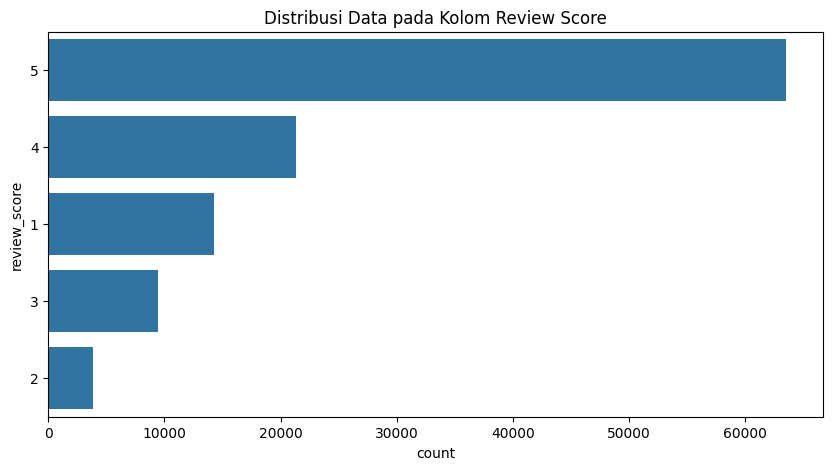

In [72]:
# Pertanyaan 5: Bagaimana distribusi rating dari pelanggan?
# Menggabungkan dataset order_reviews_imputed dengan order_products_category
order_reviews_products = pd.merge(order_reviews_imputed, order_items, on='order_id')

# Melihat distribusi data pada kolom 'review_score'
plt.figure(figsize=(10, 5))
sns.countplot(y='review_score', data=order_reviews_products, order=order_reviews_products['review_score'].value_counts().index)
plt.title('Distribusi Data pada Kolom Review Score')

**Insight:**
- Count plot distribusi rating menunjukkan mayoritas pelanggan memberikan nilai tinggi, yang menandakan tingkat kepuasan yang baik.
- Meskipun begitu, terdapat beberapa nilai rating yang lebih rendah yang perlu ditinjau untuk mengidentifikasi potensi perbaikan dalam layanan atau produk.
- Analisis ini memberikan gambaran keseluruhan tentang kualitas pengalaman pelanggan dan area yang mungkin perlu diperbaiki.

## Analisis Lanjutan (Opsional)

## RFM Analysis

In [74]:
current_date = datetime.strptime("2018-09-01", "%Y-%m-%d")  # Tanggal acuan
rfm_data = orders.merge(order_payments, on='order_id')
rfm_data = rfm_data.merge(customers, on='customer_id')

rfm = rfm_data.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - pd.to_datetime(x.max())).days,  # Recency
    'order_id': 'count',  # Frequency
    'payment_value': 'sum'  # Monetary
}).reset_index()

rfm.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']
print(rfm.describe())

            Recency     Frequency      Monetary
count  96095.000000  96095.000000  96095.000000
mean     241.103876      1.081076    166.594226
std      153.411046      0.462548    231.428912
min      -47.000000      1.000000      0.000000
25%      117.000000      1.000000     63.120000
50%      222.000000      1.000000    108.000000
75%      350.000000      1.000000    183.530000
max      726.000000     33.000000  13664.080000


**Insight:**
- Recency: Rata-rata pelanggan memiliki waktu sekitar 241 hari sejak transaksi terakhir (berdasarkan mean=241), menandakan bahwa sebagian besar pelanggan tidak bertransaksi dalam waktu dekat. Namun, adanya min Recency bernilai negatif atau sangat kecil dapat mengindikasikan adanya data anomali atau ketidaksesuaian tanggal di beberapa order.
- Frequency: Nilai rata-rata sekitar 1.08 menunjukkan kebanyakan pelanggan hanya melakukan satu kali transaksi. Hal ini menegaskan bahwa e-commerce ini memiliki banyak “one-time buyer” yang perlu diupayakan menjadi pelanggan berulang (repeat buyer).
- Monetary: Nilai rata-rata 166.59 dengan maksimum mencapai 13.664,8 mengindikasikan ada segelintir pelanggan dengan pengeluaran sangat tinggi (big spenders). Segmentasi pelanggan berdasarkan Monetary penting untuk menentukan strategi pemasaran khusus.

## Geospatial Analysis

In [ ]:
# Buat peta dasar dengan pusat di Brazil
m = folium.Map(location=[-20.998353, -46.461098], zoom_start=4)

# Jika dataset sangat besar, ambil sampel acak untuk mempercepat proses
sample_data = geolocation_clean.sample(n=min(10000, len(geolocation_clean)), random_state=42)

# Gunakan FastMarkerCluster untuk performa lebih baik
locations = list(zip(sample_data['geolocation_lat'], sample_data['geolocation_lng']))
FastMarkerCluster(locations).add_to(m)

# Simpan peta dalam file HTML (agar bisa dibuka di browser)
m.save("geolocation_map.html")

# Tampilkan peta jika menggunakan Jupyter Notebook
m

**Insight:**
- Pemusatan Pelanggan: Peta interaktif (Folium) menunjukkan sebagian besar pelanggan berada di wilayah tenggara Brasil (misalnya dekat Sao Paulo dan sekitarnya), sejalan dengan fakta bahwa region tersebut padat penduduk.
- Wilayah Tersebar: Walau mayoritas pelanggan di wilayah tertentu, terdapat titik-titik kluster di beberapa area lain. Hal ini memberikan peluang ekspansi atau peningkatan infrastruktur logistik di wilayah-wilayah dengan pertumbuhan pelanggan potensial.
- Sampel Data: Penggunaan FastMarkerCluster dan sampling 10.000 baris menunjukkan bahwa dataset berukuran besar. Visualisasi tetap representatif tanpa harus memplot keseluruhan data, menjaga performa peta tetap responsif.

In [ ]:
# Membaca file geolocation_clean yang besar (pastikan file ini ada secara lokal)
geolocation = pd.read_csv("data/geolocation_clean.csv")

# Ambil sampel 5000 baris secara acak (atau sesuaikan dengan kebutuhan)
geolocation_sample = geolocation.sample(n=10000, random_state=42)

# Simpan sampel data ke file baru di folder 'data'
geolocation_sample.to_csv("data/geolocation_sample.csv", index=False)

print("File geolocation_sample.csv berhasil disimpan.")

File geolocation_sample.csv berhasil disimpan.


## Clustering

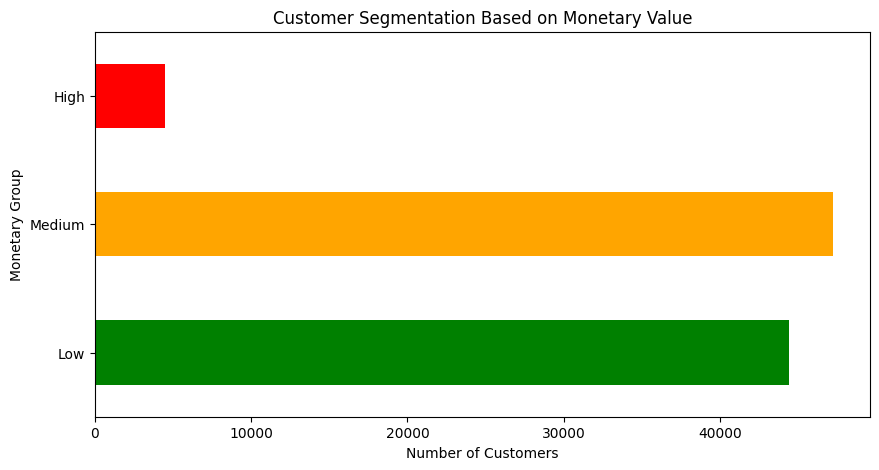

In [ ]:
def categorize_monetary(value):
    if value < 100:
        return 'Low'
    elif 100 <= value < 500:
        return 'Medium'
    else:
        return 'High'

rfm['Monetary_Group'] = rfm['Monetary'].apply(categorize_monetary)

# Visualisasi Clustering
monetary_order = ['Low', 'Medium', 'High']
group_counts = rfm['Monetary_Group'].value_counts().reindex(monetary_order)

plt.figure(figsize=(10, 5))
group_counts.plot(kind='barh', color=['green', 'orange', 'red'])
plt.ylabel("Monetary Group")
plt.xlabel("Number of Customers")
plt.title("Customer Segmentation Based on Monetary Value")
plt.show()

**Insight:**
- Tiga Segmen: Pembagian ‘Low’, ‘Medium’, dan ‘High’ dilakukan dengan batasan <100, 100–500, dan >500. Ini membantu memahami variasi pengeluaran pelanggan.
- Distribusi Segmen: Dari bar chart, terlihat sebagian besar pelanggan masuk ke segmen ‘Low’ atau ‘Medium’, sedangkan ‘High’ relatif lebih sedikit. Namun, segmen ‘High’ mungkin berkontribusi signifikan pada total pendapatan (Pareto Principle).
- Strategi Lanjutan: Dengan segmentasi manual ini, e-commerce dapat menawarkan promo khusus bagi pelanggan ‘High’ (loyalty program), dan mengupayakan kenaikan penjualan bagi segmen ‘Low’–‘Medium’ agar mereka naik kelas ke segmen yang lebih bernilai.

## Conclusion

- Conclution pertanyaan 1: Berdasarkan analisis distribusi pelanggan per state, terlihat bahwa beberapa wilayah, khususnya state dengan jumlah pelanggan terbanyak, merupakan sumber pasar yang sangat potensial. Oleh karena itu, perusahaan harus memfokuskan upaya pemasaran dan ekspansi di wilayah tersebut untuk mengoptimalkan pertumbuhan dan penetrasi pasar.

- Conclution pertanyaan 2: Dari analisis metode pembayaran, terbukti bahwa sebagian besar transaksi menggunakan metode pembayaran digital seperti kartu kredit. Hal ini menunjukkan bahwa pelanggan lebih memilih kemudahan dan keamanan dalam bertransaksi secara online, sehingga sistem pembayaran harus terus dioptimalkan untuk meningkatkan kecepatan dan kenyamanan proses checkout.

- Conclusion pertanyaan 3: Analisis penjualan produk mengungkapkan bahwa terdapat beberapa kategori produk yang mendominasi penjualan. Dengan mengetahui kategori-kategori terbaik ini, perusahaan dapat mengalokasikan sumber daya dan upaya pemasaran secara lebih efisien, sehingga dapat meningkatkan pendapatan dan mengoptimalkan pengelolaan stok.

- Conclusion pertanyaan 4: Dari analisis waktu pengiriman, sebagian besar pesanan berhasil dikirim dalam waktu yang singkat, namun terdapat beberapa outlier yang menunjukkan adanya keterlambatan. Hal ini mengindikasikan bahwa walaupun performa pengiriman secara umum memuaskan, perlu dilakukan evaluasi lebih lanjut terhadap proses logistik untuk mengatasi kasus-kasus keterlambatan dan memastikan konsistensi pengiriman yang optimal.

- Conclusion pertanyaan 5: Hasil analisis distribusi rating pelanggan menunjukkan bahwa mayoritas pelanggan puas dengan layanan dan produk, tercermin dari nilai rating yang tinggi. Namun, adanya rating rendah yang tersebar mengindikasikan bahwa masih ada beberapa aspek yang perlu ditingkatkan. Dengan mengidentifikasi faktor-faktor penyebab rating rendah, perusahaan dapat lebih fokus dalam meningkatkan kualitas layanan dan produk guna mempertahankan loyalitas pelanggan.